In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


# Scalability -- Transaction

In [2]:
df1 = pd.read_csv('./data/daily_transactions.csv')

In [3]:
df1.max()

Timestamp    1693785600000
Value              1932226
dtype: int64

In [4]:
df2 = pd.read_csv('./algorand_data/al_transac_data_count_fee.csv', names=["Time", "Value1", "Value2"])

In [8]:
pd.set_option('display.max_columns', 10, 'display.max_rows', 10,'display.float_format', lambda x: '%.2f' %x)
df2['Value1'].max()

9271981

Text(0, 0.5, 'Count')

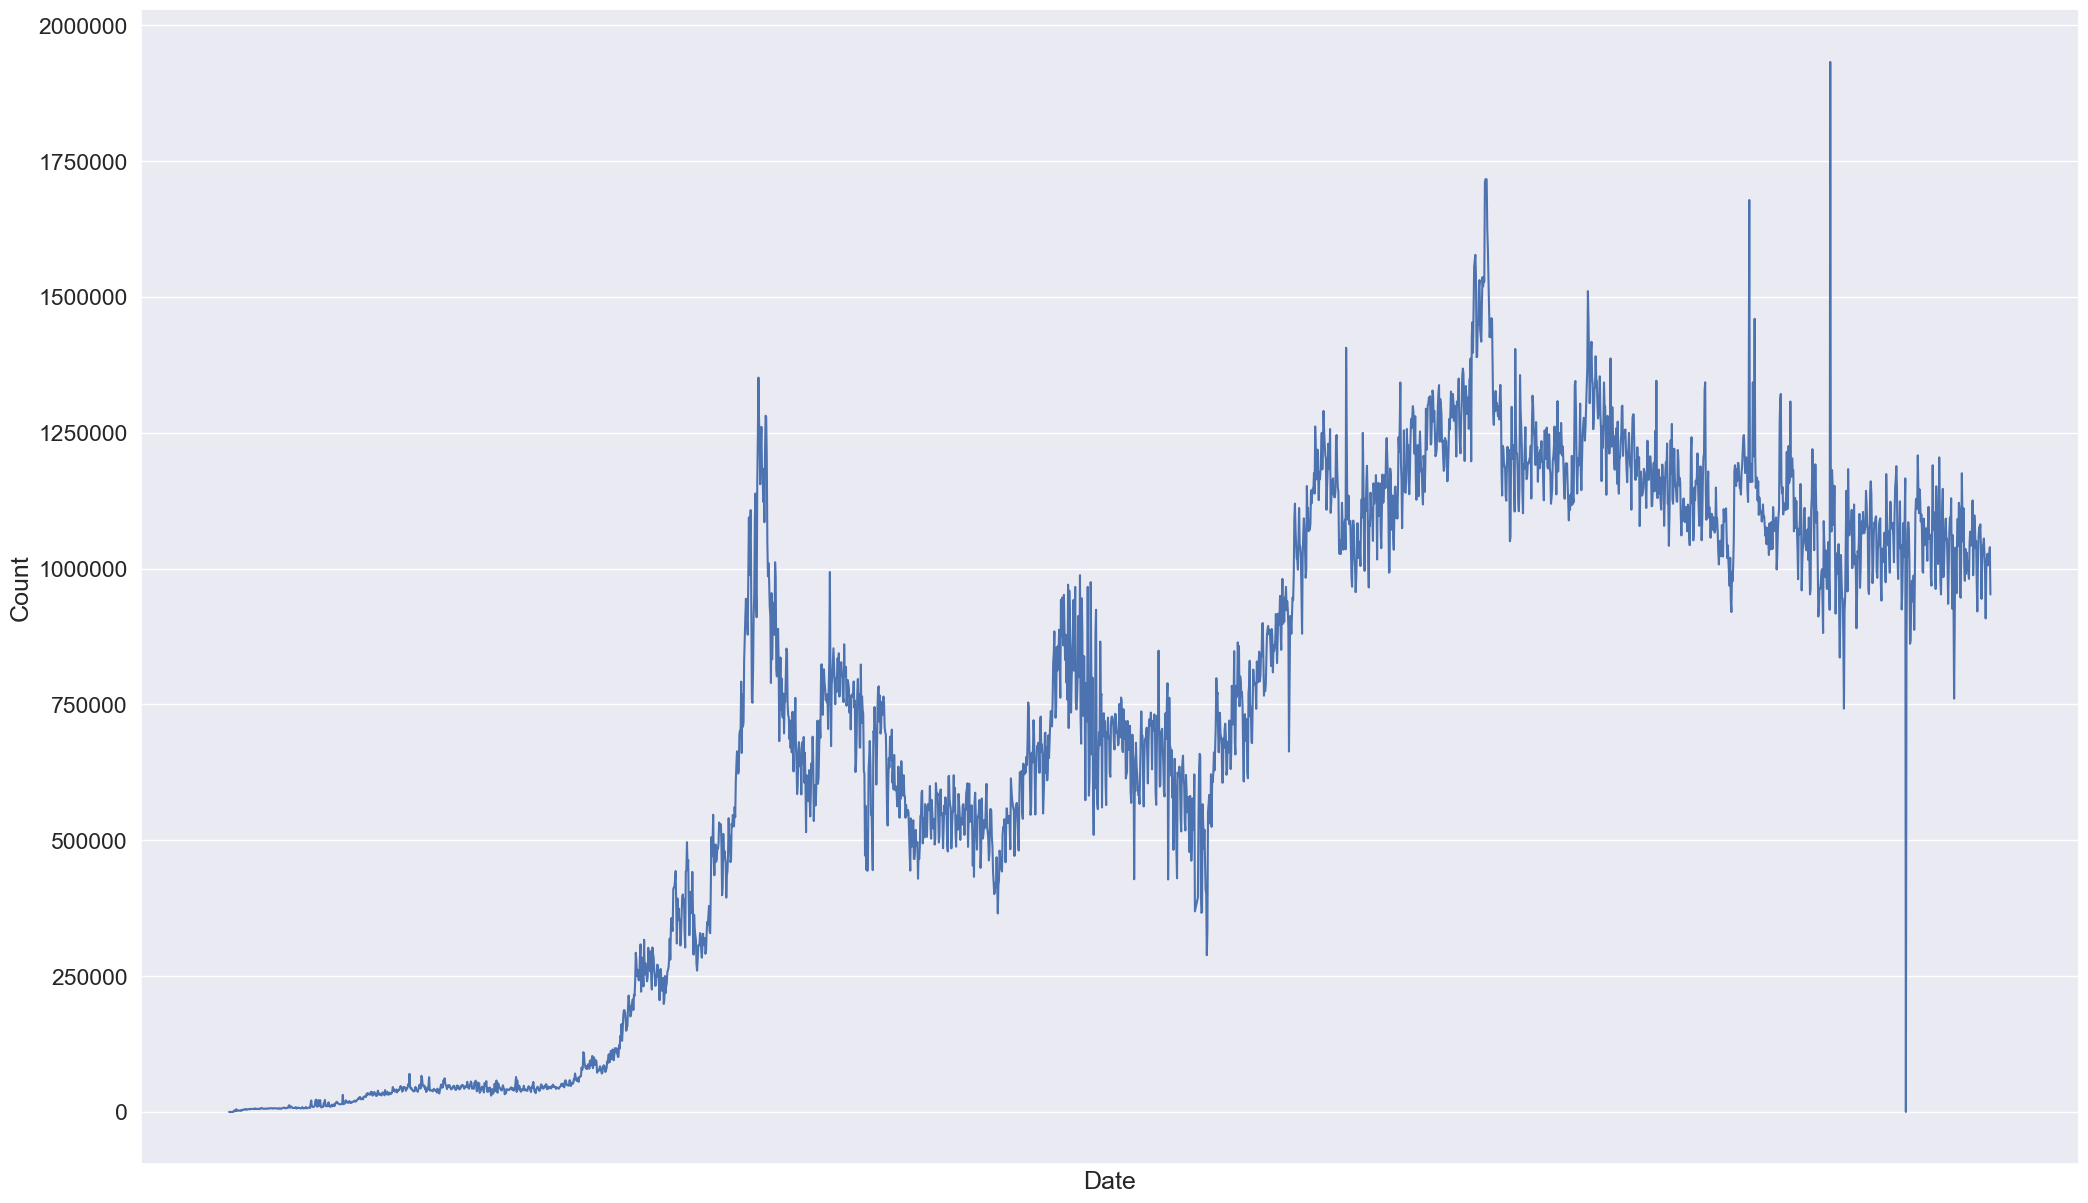

In [68]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35,10))
fig, ax= plt.subplots(figsize=(25, 15), dpi=100)
# ax1.plot(df1["Value"])
# ax2.plot(df2["Value1"])
ax.set_xticks([i + 1 for i in range(7)])
sns.set(font_scale=1.5)
sns.set_style('dark')
sns.lineplot(x='Timestamp', y='Value', data=df1)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel("Date")
plt.ylabel("Count")
# ax2 = sns.lineplot(x='Time', y='Value1', data=df2)
# plt.savefig("Beacon_transaction.pdf")

C:\Users\jinmingwei\AppData\Local\Temp\ipykernel_3852\4219724062.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])


Text(0, 0.5, 'Count')

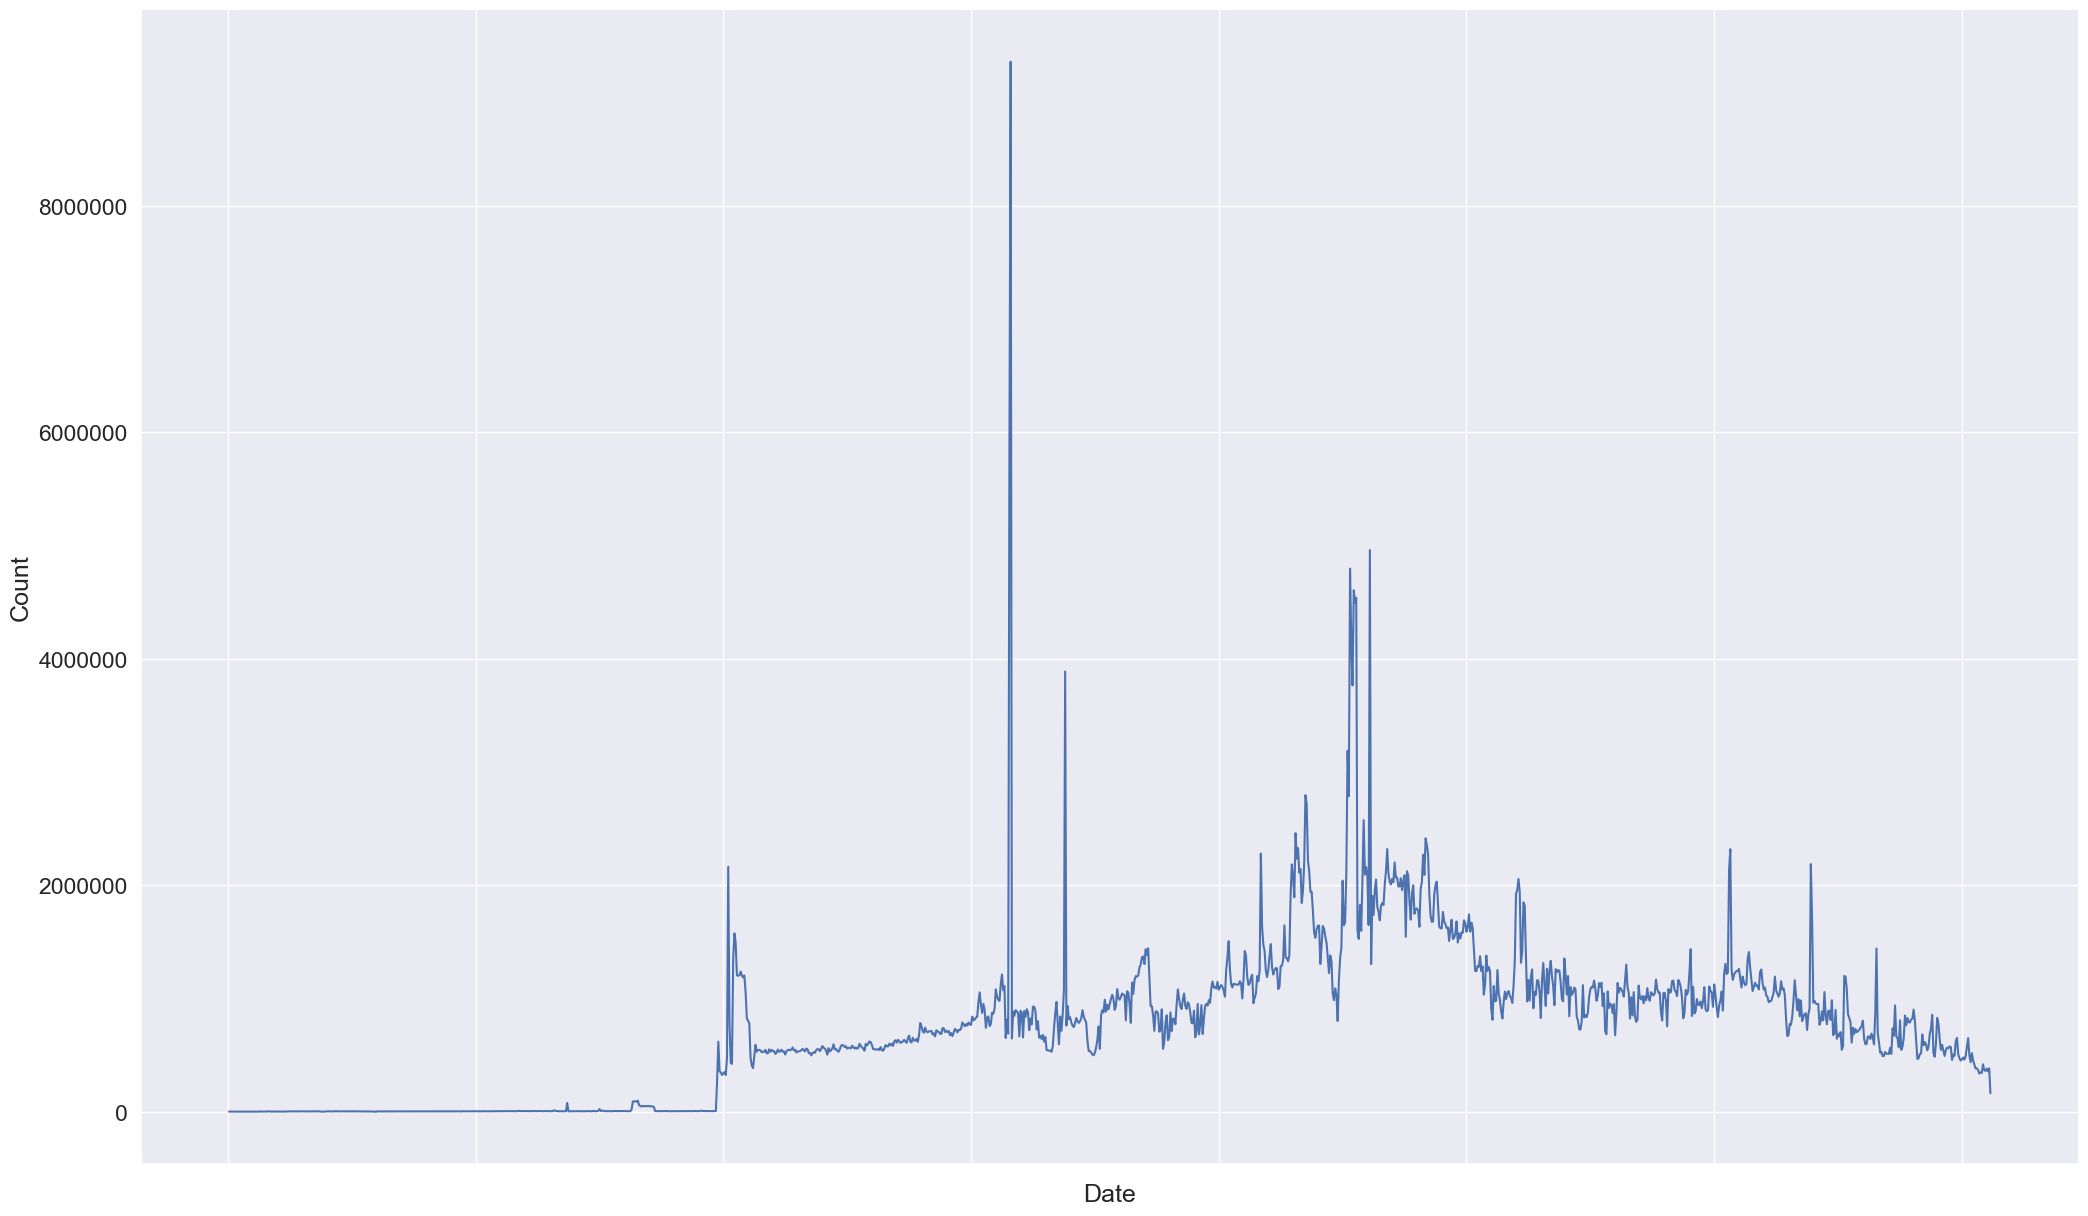

In [72]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35,10))
fig, ax= plt.subplots(figsize=(25, 15), dpi=100)
# ax1.plot(df1["Value"])
# ax2.plot(df2["Value1"])
# ax.set_xticks([i + 1 for i in range(8)])
# sns.set_style('dark')
ax.set_xticklabels([''])
sns.set_context('talk')
sns.set(font_scale=1.5)
sns.lineplot(x='Time', y='Value1', data=df2)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Date")
plt.ylabel("Count")
# ax2 = sns.lineplot(x='Time', y='Value1', data=df2)

# Scalability -- Latency

In [9]:
df3 = pd.read_csv('./data/avg_blk_time.csv')
df3

,Timestamp,Value
0,1438214400000,4.46
1,1438300800000,12.58
2,1438387200000,16.34
3,1438473600000,16.12
4,1438560000000,16.37
...,...,...
2950,1693440000000,12.09
2951,1693526400000,12.10
2952,1693612800000,12.13
2953,1693699200000,12.09


In [10]:
df3.mean()

Timestamp   1565982983147.21
Value                  14.42
dtype: float64

Text(0, 0.5, 'Seconds')

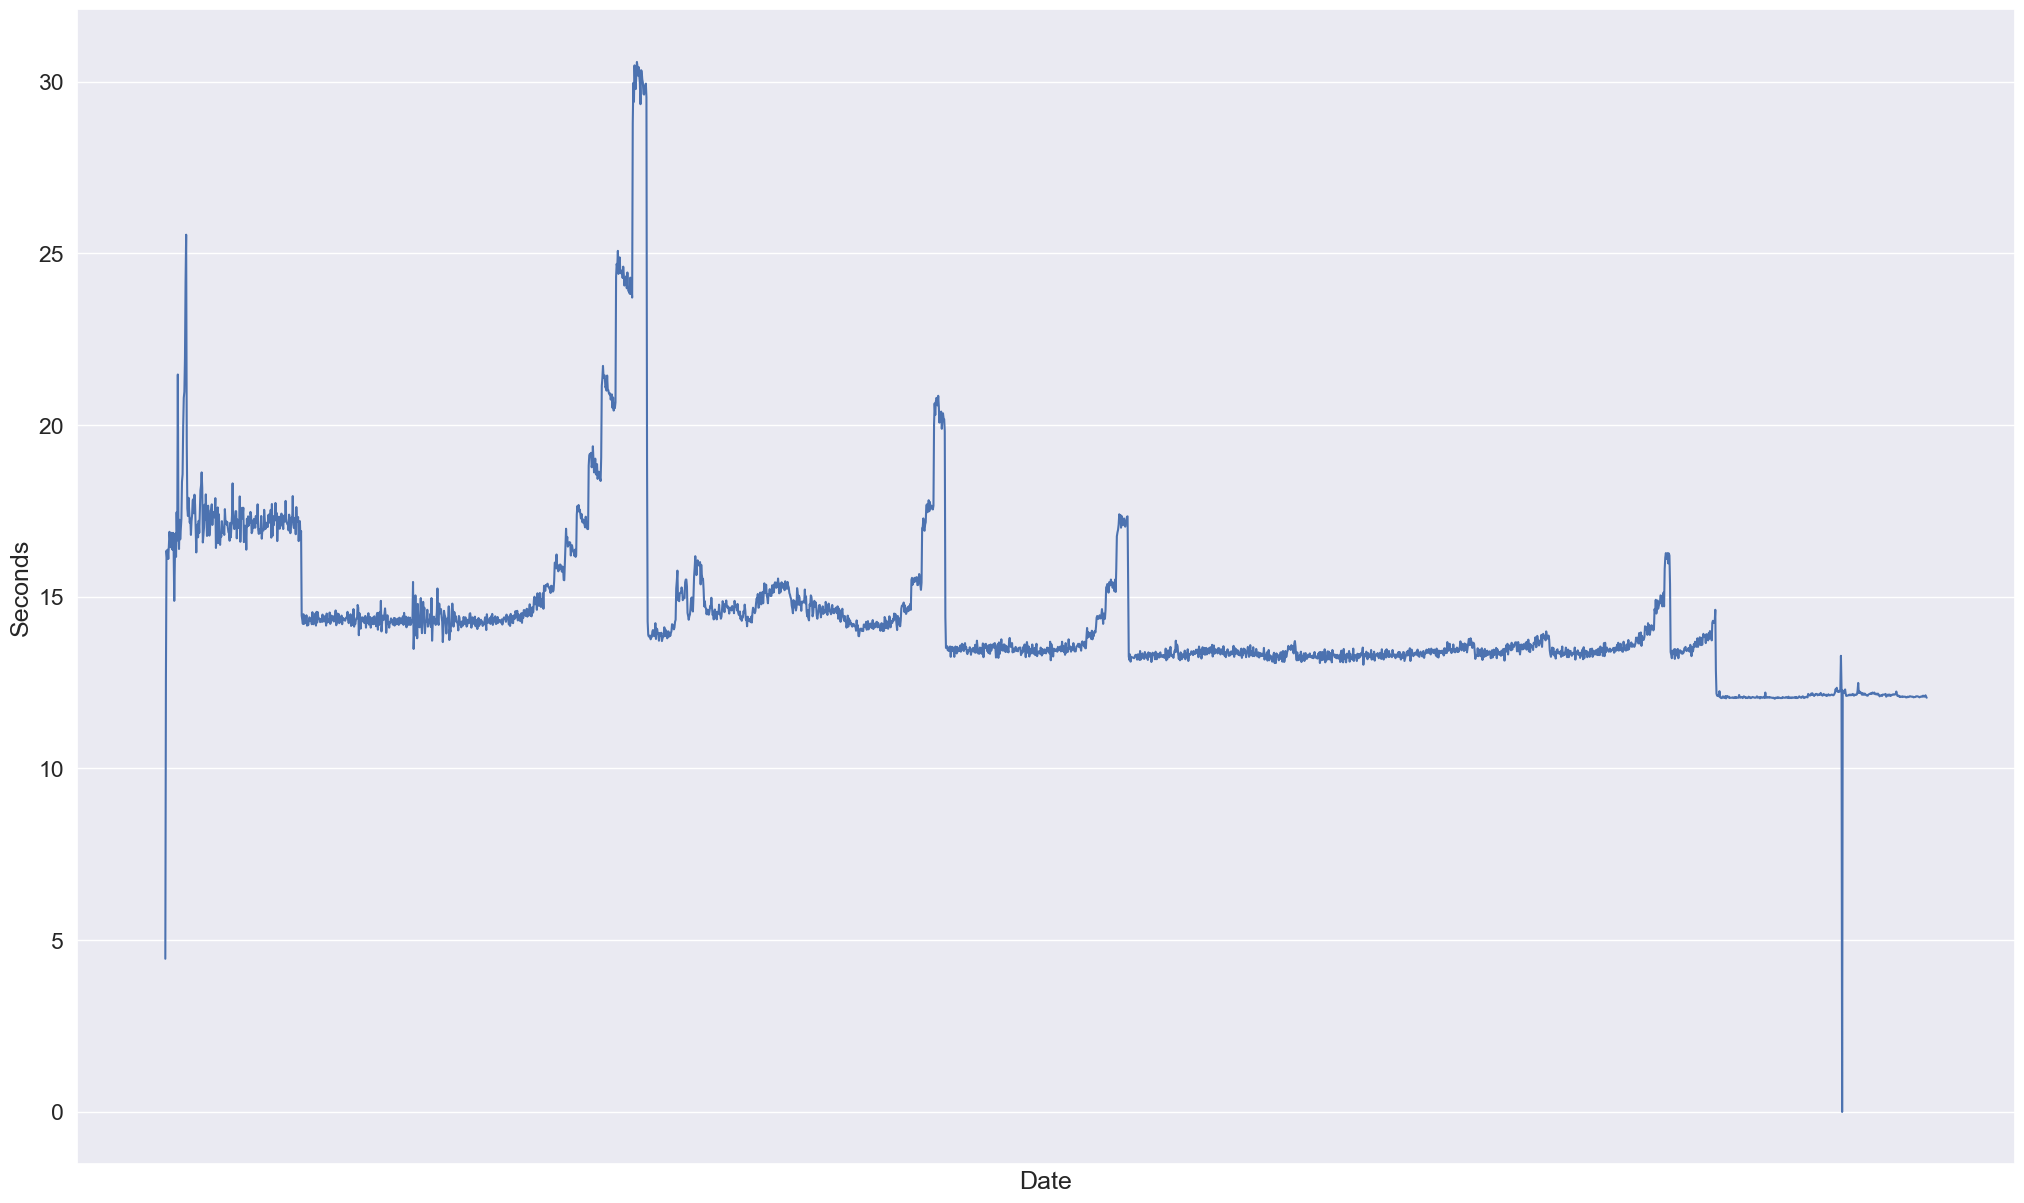

In [16]:
fig, ax= plt.subplots(figsize=(25, 15), dpi=100)
# ax1.plot(df1["Value"])
# ax2.plot(df2["Value1"])
ax.set_xticks([i + 1 for i in range(7)])
sns.set(font_scale=1.5)
sns.set_style('darkgrid')
sns.lineplot(x='Timestamp', y='Value', data=df3)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel("Date")
plt.ylabel("Seconds")

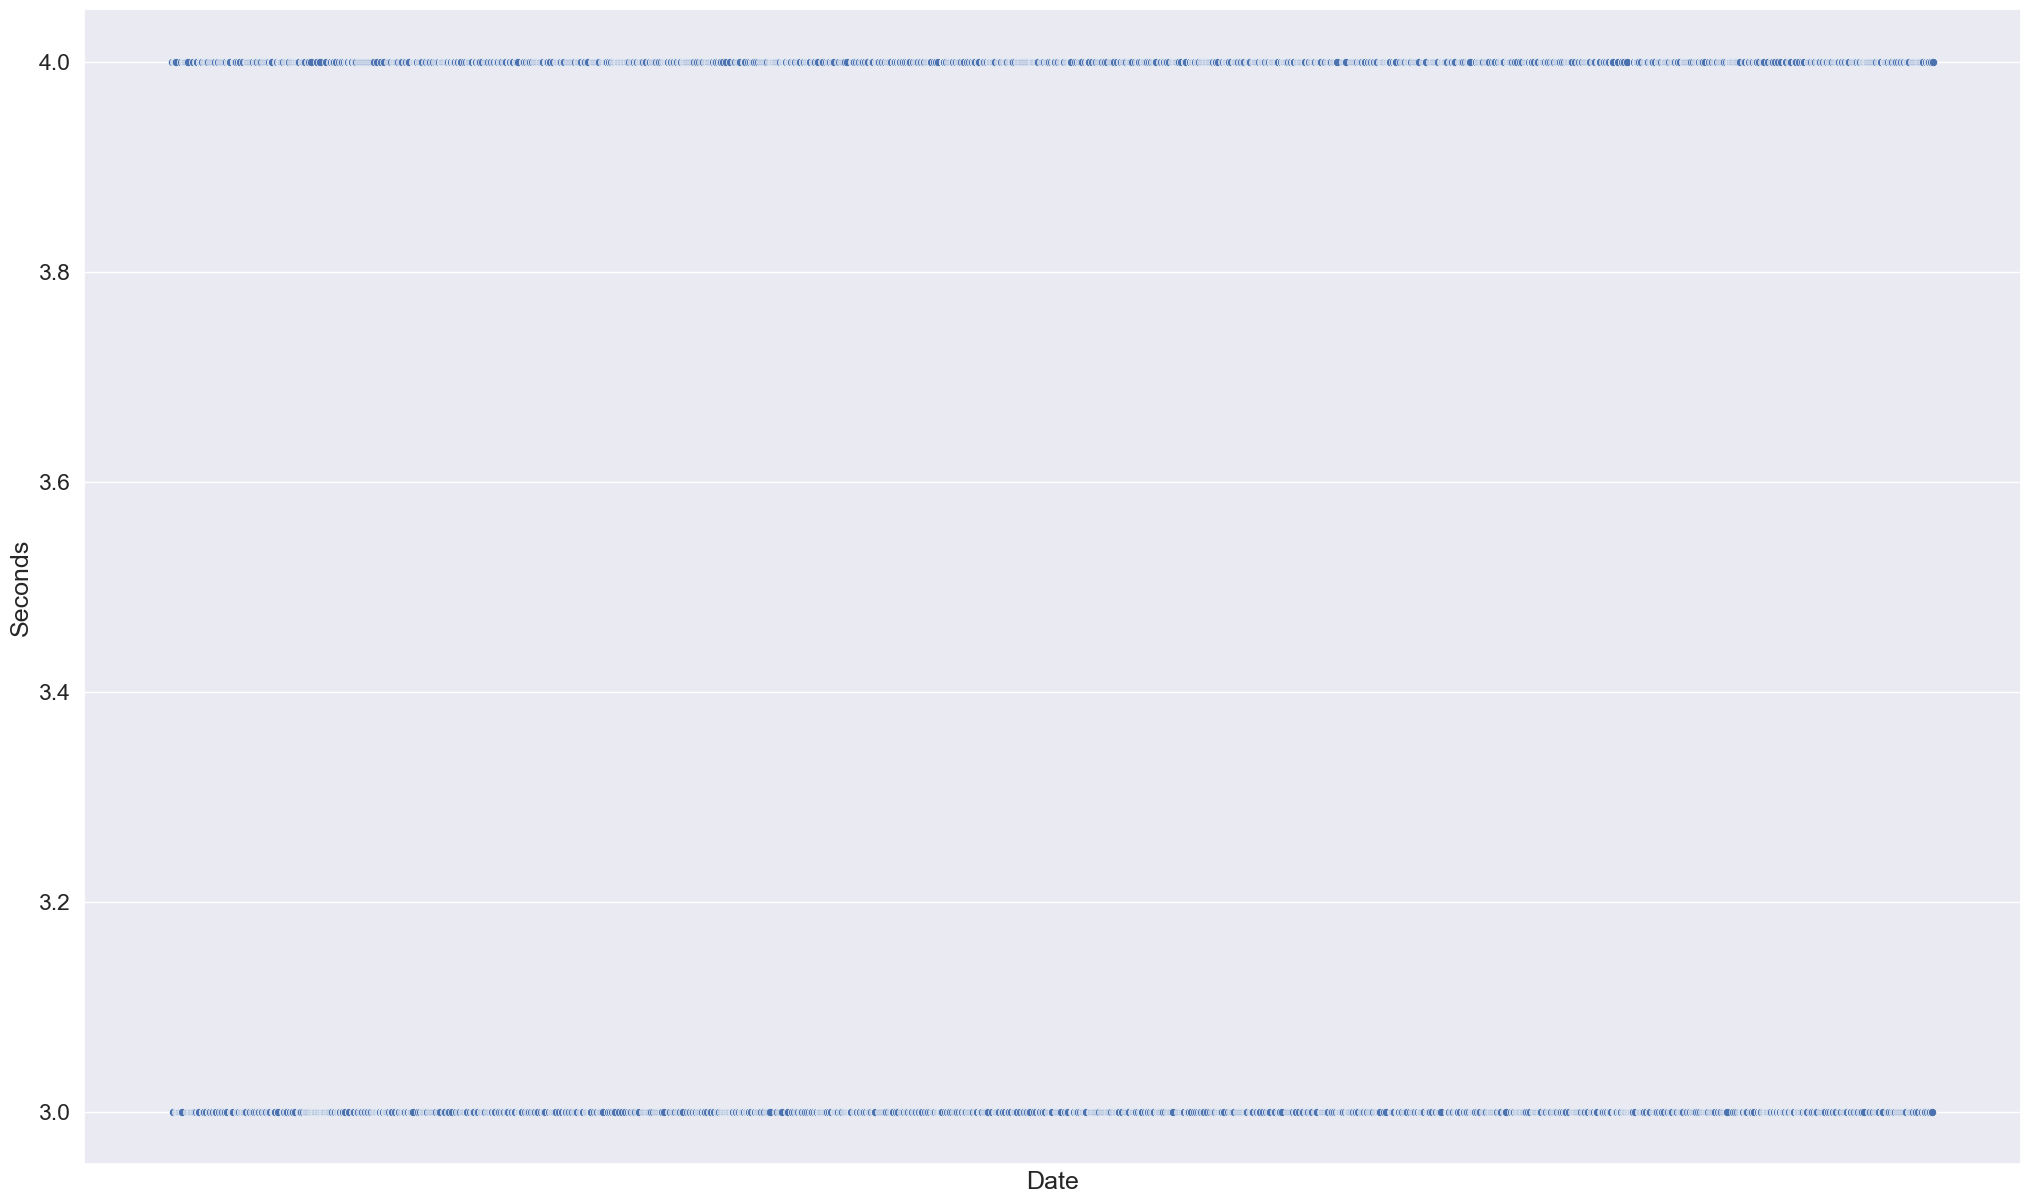

In [26]:
# fig, ax= plt.subplots(figsize=(25, 15), dpi=100)
# # ax1.plot(df1["Value"])
# # ax2.plot(df2["Value1"])
# ax.set_xticks([i + 1 for i in range(7)])
# sns.set(font_scale=1.5)
# sns.set_style('darkgrid')
# sns.lineplot(x='Timestamp', y='Value', data=df3)
# plt.ticklabel_format(style='plain', axis='both')
# plt.xlabel("Date")
# plt.ylabel("Seconds")
import numpy as np
# 生成一些随机数据，假设有 10 个数据点
fig = plt.subplots(figsize=(25, 15), dpi=100)
data_points = np.random.choice([3, 4], size=2955)
x_values = np.arange(1, len(data_points) + 1)

sns.set(font_scale=1.5)
sns.scatterplot(x=x_values, y=data_points)
plt.ticklabel_format(style='plain', axis='both')
# custom_y_ticks = [2, 3, 4, 5]  # 你可以根据需要调整刻度
# plt.yticks(custom_y_ticks)
plt.xticks([])
plt.xlabel('Date')
plt.ylabel('Seconds')

# 显示图像
plt.show()


# Decentralization

In [28]:
df_validator = pd.read_csv('./data/validator_data.csv')
df_proposer = pd.read_csv('./algorand_data/al_block_data_proposercount_reward.csv', names=['Iime', 'Count', 'reward'])

In [30]:
df_validator['Value']

0        21063
1        21339
2        22238
3        23128
4        24027
         ...  
1003    762949
1004    765130
1005    767067
1006    769382
1007    771738
Name: Value, Length: 1008, dtype: int64

In [54]:
import math
import numpy as np
def Shannon_Entropy(value_list):
    total = sum(value_list)
    E = 1
    for value in value_list:
        P = value / total
        E *= math.pow(P, -P)
    return E

def HHI(value_list):
    total = sum(value_list)
    H = 0
    for value in value_list:
        H = value / total
        H += math.pow(H,2)
    return H

def Nakamoto(value_list):
    total = sum(value_list)
    N = 0
    for i, value in enumerate(value_list):
        N += (value/total)
        if N >= 0.51:
            return i
        
def Gini(value_list):
    n = len(value_list)
    numer = 0
    denom = 0

    for i in range(n):
        for j in range(n):
            numer += np.abs(value_list[i] - value_list[j])
    
    denom = sum(value_list)

    G = numer / (2 * n * denom)
    return G

## Consensus Layer

In [55]:
Indice_1 = Shannon_Entropy(df_validator['Value'])
Indice_2 = HHI(df_validator['Value'])
Indice_3 = Nakamoto(df_validator['Value'])
Indice_4 = Gini(df_validator['Value'])

print(f'Shannon Entropy is {Indice_1}')
print(f'HHI is {Indice_2}')
print(f'Nakamoto is {Indice_3}')
print(f'Gini is {Indice_4}')

Shannon Entropy is 866.7593076039108
HHI is 0.0021858554447999365
Nakamoto is 705
Gini is 0.3009188435689108


In [56]:
# print(Shannon_Entropy(df_proposer['Count']))
# print(HHI(df_proposer['Count']))
# print(Nakamoto(df_proposer['Count']))
# print(Gini(df_proposer['Count']))
Indice_5 = Shannon_Entropy(df_proposer['Count'])
Indice_6 = HHI(df_proposer['Count'])
Indice_7 = Nakamoto(df_proposer['Count'])
Indice_8 = Gini(df_proposer['Count'])

print(f'Shannon Entropy is {Indice_5}')
print(f'HHI is {Indice_6}')
print(f'Nakamoto is {Indice_7}')
print(f'Gini is {Indice_8}')

Shannon Entropy is 1364.3439181798813
HHI is 0.0005448708146679988
Nakamoto is 821
Gini is 0.1547998478239295


## Transaction Layer

In [57]:
df_bc_tran = pd.read_csv('./data/daily_transactions.csv')
df_alg_tran = pd.read_csv('./algorand_data/al_transac_data_count_fee.csv', names=['Time', 'Count', 'Fees'])

In [58]:
indice_1 = Shannon_Entropy(df_bc_tran['Value'])
indice_2 = HHI(df_bc_tran['Value'])
indice_3 = Nakamoto(df_bc_tran['Value'])
indice_4 = Gini(df_bc_tran['Value'])

print(f'Shannon Entropy is {indice_1}',
      f'HHI is {indice_2}',
      f'Nakamoto is {indice_3}',
      f'Gini is {Indice_4}'
      )

Shannon Entropy is 2252.603697252612 HHI is 0.00045977583838541285 Nakamoto is 2067 Gini is 0.3009188435689108


In [59]:
indice_5 = Shannon_Entropy(df_alg_tran['Count'])
indice_6 = HHI(df_alg_tran['Count'])
indice_7 = Nakamoto(df_alg_tran['Count'])
indice_8 = Gini(df_alg_tran['Count'])

print(f'Shannon Entropy is {indice_5}',
      f'HHI is {indice_6}',
      f'Nakamoto is {indice_7}',
      f'Gini is {Indice_8}'
      )

Shannon Entropy is 920.1922963797815 HHI is 0.0001520960968563402 Nakamoto is 931 Gini is 0.1547998478239295
